In [1]:
!pip install graphein
!pip install -U kaleido
!pip install biovec
!pip install pytorch3d
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 185 kB 6.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 197 kB 66.4 MB/s 
     |████████████████████████████████| 72 kB 1.9 MB/s 
     |████████████████████████████████| 878 kB 102.6 MB/s 
     |████████████████████████████████| 3.1 MB 7.1 MB/s 
     |████████████████████████████████| 662 kB 86.8 MB/s 
     |████████████████████████████████| 9.4 MB 92.5 MB/s 
     |████████████████████████████████| 58 kB 7.5 MB/s 
     |████████████████████████████████| 237 kB 88.3 MB/s 
     |████████████████████████████████| 47 kB 5.9 MB/s 
     |████████████████████████████████| 48 kB 6.6 MB/s 
     |████████████████████████████████| 144 kB 90.1 MB/s 
     |████████████████████████████████| 295 kB 87.2 MB/s 
     |████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 131 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.2 MB 6.9 MB/s 
  Created wheel for biovec: filename=biovec-0.2.7-py3-none-any.whl size=3464 sha256=e0f38f4cd7ada9adb66ad9b0b0711b3c71a2927c11ccc519258e85e7c0eba30e
  Stored in directory: /root/.cache/pip/wheels/9f/c6/89/87aaf7b2d49ed06c0c8843e576bea4dddbb480b49a5a9f9088
  Created wheel for gensim: filename=gensim-3.4.0-cp38-cp38-linux_x86_64.whl size=23477340 sha256=1801d1a6af73b4ed81c3513dd91f9a62e10406f189d3181372832ff6ac2982fd
  Stored in directory: /root/.cache/pip/wheels/b4/a4/71/a301cdb2b7d5d31525936fcb8dcd9a5f144578d047407f7cf9
  Created wheel for pyfasta: filename=pyfasta-0.5.2-py3-none-any.whl size=14237 sha256=2a5d95ffe4c5263b44a89cfdddd2672657acb18590295c5ef12998fc0fc9b041
  Stored

In [2]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np


def create_train_dataset():
    n_train = 100000
    max_train_card = 10

    ############## Task 1
    
    ##################
    # your code here #
    X_train = np.zeros((n_train, max_train_card))
    y_train = np.zeros(n_train)
    for i in range(n_train):
      card = np.random.randint(1, max_train_card+1)
      X_train[i, -card:] = np.random.randint(1, max_train_card+1, size = card)
      y_train[i] = np.sum(X_train[i, :])
      
    ##################

    return X_train, y_train


def create_test_dataset():
    
    ############## Task 2
    
    ##################
    # your code here #
    n_test = 200000
    min_test_card = 5
    max_test_card = 101
    step_test_card = 5
    cards = range(min_test_card, max_test_card, step_test_card)
    n_samples_per_card = n_test // len(cards)

    X_test = list()
    y_test = list()

    for card in cards:
      X = np.random.randint(1, 11, size=(n_samples_per_card, card))
      X_test.append(X)
      y_test.append(np.sum(X, axis=1))
    ##################

    return X_test, y_test

In [3]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import torch
import torch.nn as nn

class DeepSets(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(DeepSets, self).__init__()
        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        
        ############## Task 3
    
        ##################
        # your code here #

        x = self.embedding(x)
        x = self.tanh(self.fc1(x))
        x = torch.sum(x, dim=1)
        x = self.fc2(x)
        ##################
        
        return x.squeeze()


class LSTM(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim):
        super(LSTM, self).__init__()

        self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        
        ############## Task 4
    
        ##################
        # your code here #
        x = self.embedding(x)
        _, (x, _) = self.lstm(x)
        x = self.fc(x)
        ##################
        
        return x.squeeze()

In [4]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import time
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn

# from utils import create_train_dataset
# from models import DeepSets, LSTM


# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 20
batch_size = 64
embedding_dim = 128
hidden_dim = 64
learning_rate = 0.001

# Generates training data
X_train, y_train = create_train_dataset()
n_train = 100000
n_digits = 11

# Initializes DeepSets model and optimizer
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(deepsets.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the DeepSets model
for epoch in range(epochs):
    t = time.time()
    deepsets.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
        
        ############## Task 5
    
        ##################
        # your code here #
        x_batch = X_train[idx[i: min(i+batch_size, n_train)], :]
        y_batch = y_train[idx[i: min(i+batch_size, n_train)]]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch).to(device)
        ##################
        
        optimizer.zero_grad()
        output = deepsets(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores DeepSets model into disk
torch.save({
    'state_dict': deepsets.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_deepsets.pth.tar')

print("Finished training for DeepSets model")
print()

# Initializes LSTM model and optimizer
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate)
loss_function = nn.L1Loss()

# Trains the LSTM model
for epoch in range(epochs):
    t = time.time()
    lstm.train()
     
    train_loss = 0
    count = 0
    idx = np.random.permutation(n_train)
    for i in range(0, n_train, batch_size):
    
        ############## Task 5
        
        ##################
        # your code here #
        x_batch = X_train[idx[i: min(i+batch_size, n_train)], :]
        y_batch = y_train[idx[i: min(i+batch_size, n_train)]]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch).to(device)
        ##################
        
        optimizer.zero_grad()
        output = lstm(x_batch)
        loss = loss_function(output, y_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
    
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(train_loss / count),
          'time: {:.4f}s'.format(time.time() - t))

# Stores LSTM model into disk
torch.save({
    'state_dict': lstm.state_dict(),
    'optimizer' : optimizer.state_dict(),
}, 'model_lstm.pth.tar')

print("Finished training for LSTM model")

Epoch: 0001 loss_train: 0.8889 time: 6.0997s
Epoch: 0002 loss_train: 0.0604 time: 2.5232s
Epoch: 0003 loss_train: 0.0486 time: 2.5315s
Epoch: 0004 loss_train: 0.0438 time: 2.4882s
Epoch: 0005 loss_train: 0.0378 time: 2.4814s
Epoch: 0006 loss_train: 0.0353 time: 2.5181s
Epoch: 0007 loss_train: 0.0326 time: 2.5107s
Epoch: 0008 loss_train: 0.0272 time: 2.5057s
Epoch: 0009 loss_train: 0.0279 time: 2.5216s
Epoch: 0010 loss_train: 0.0270 time: 2.5067s
Epoch: 0011 loss_train: 0.0276 time: 2.5826s
Epoch: 0012 loss_train: 0.0262 time: 2.5118s
Epoch: 0013 loss_train: 0.0254 time: 2.4822s
Epoch: 0014 loss_train: 0.0254 time: 2.4966s
Epoch: 0015 loss_train: 0.0267 time: 2.5015s
Epoch: 0016 loss_train: 0.0244 time: 2.4739s
Epoch: 0017 loss_train: 0.0246 time: 2.4803s
Epoch: 0018 loss_train: 0.0250 time: 2.4853s
Epoch: 0019 loss_train: 0.0259 time: 2.4890s
Epoch: 0020 loss_train: 0.0265 time: 2.4901s
Finished training for DeepSets model

Epoch: 0001 loss_train: 6.2159 time: 4.3520s
Epoch: 0002 loss_

Loading DeepSets checkpoint!
Loading LSTM checkpoint!


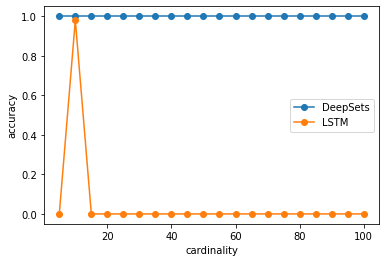

In [5]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_absolute_error
import torch

# from utils import create_test_dataset
# from models import DeepSets, LSTM

# Initializes device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
batch_size = 64
embedding_dim = 128
hidden_dim = 64

# Generates test data
X_test, y_test = create_test_dataset()
cards = [X_test[i].shape[1] for i in range(len(X_test))]
n_samples_per_card = X_test[0].shape[0]
n_digits = 11

# Retrieves DeepSets model
deepsets = DeepSets(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading DeepSets checkpoint!")
checkpoint = torch.load('model_deepsets.pth.tar')
deepsets.load_state_dict(checkpoint['state_dict'])
deepsets.eval()

# Retrieves LSTM model
lstm = LSTM(n_digits, embedding_dim, hidden_dim).to(device)
print("Loading LSTM checkpoint!")
checkpoint = torch.load('model_lstm.pth.tar')
lstm.load_state_dict(checkpoint['state_dict'])
lstm.eval()

# Dict to store the results
results = {'deepsets': {'acc':[], 'mae':[]}, 'lstm': {'acc':[], 'mae':[]}}

for i in range(len(cards)):
    y_pred_deepsets = list()
    y_pred_lstm = list()
    for j in range(0, n_samples_per_card, batch_size):
        
        ############## Task 6
    
        ##################
        # your code here #
        x_batch = X_test[i][j:min(j+batch_size, n_samples_per_card), :]
        y_batch = y_test[i][j:min(j+batch_size, n_samples_per_card)]

        x_batch = torch.LongTensor(x_batch).to(device)
        y_batch = torch.FloatTensor(y_batch).to(device)

        output_deepsets = deepsets(x_batch)
        y_pred_deepsets.append(output_deepsets)

        output_lstm = lstm(x_batch)
        y_pred_lstm.append(output_lstm)
        ##################
        
    y_pred_deepsets = torch.cat(y_pred_deepsets)
    y_pred_deepsets = y_pred_deepsets.detach().cpu().numpy()
    
    acc_deepsets = accuracy_score(y_test[i], np.round(y_pred_deepsets)) #your code here
    mae_deepsets = mean_absolute_error(y_test[i], y_pred_deepsets)    #your code here
    results['deepsets']['acc'].append(acc_deepsets)
    results['deepsets']['mae'].append(mae_deepsets)
    
    y_pred_lstm = torch.cat(y_pred_lstm)
    y_pred_lstm = y_pred_lstm.detach().cpu().numpy()
    
    acc_lstm = accuracy_score(y_test[i], np.round(y_pred_lstm))#your code here
    mae_lstm = mean_absolute_error(y_test[i], y_pred_lstm) #your code here
    results['lstm']['acc'].append(acc_lstm)
    results['lstm']['mae'].append(mae_lstm)


############## Task 7
    
##################
# your code here #
plt.plot(cards, results["deepsets"]["acc"], "-o", label = "DeepSets")
plt.plot(cards, results["lstm"]["acc"], "-o", label = "LSTM")
plt.xlabel("cardinality")
plt.ylabel("accuracy")
plt.legend()
plt.show()
##################

In [6]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import matplotlib.pyplot as plt

from functools import partial

from graphein.protein.config import ProteinGraphConfig
from graphein.protein.graphs import construct_graph
from graphein.protein.visualisation import plot_protein_structure_graph, plotly_protein_structure_graph
from graphein.protein.analysis import plot_degree_by_residue_type, plot_edge_type_distribution, plot_residue_composition
from graphein.protein.edges.distance import add_peptide_bonds, add_hydrogen_bond_interactions, add_disulfide_interactions, add_ionic_interactions, add_aromatic_interactions, add_aromatic_sulphur_interactions, add_cation_pi_interactions, add_distance_threshold, add_k_nn_edges
from graphein.protein.features.nodes.amino_acid import amino_acid_one_hot, expasy_protein_scale, meiler_embedding
from graphein.protein.utils import download_alphafold_structure

# Configuration object for graph construction
config = ProteinGraphConfig(**{"node_metadata_functions": [amino_acid_one_hot, 
                                                           expasy_protein_scale,
                                                           meiler_embedding],
                               "edge_construction_functions": [add_peptide_bonds,
                                                  add_aromatic_interactions,
                                                  add_hydrogen_bond_interactions,
                                                  add_disulfide_interactions,
                                                  add_ionic_interactions,
                                                  add_aromatic_sulphur_interactions,
                                                  add_cation_pi_interactions,
                                                  partial(add_distance_threshold, long_interaction_threshold=5, threshold=10.),
                                                  partial(add_k_nn_edges, k=3, long_interaction_threshold=2)],
                               })

PDB_CODE = "Q5VSL9"


############## Task 8
    
##################
# your code here #
protein_path  = download_alphafold_structure(PDB_CODE, aligned_score=False)
G = construct_graph(pdb_path=protein_path, config=config)
##################

# Print number of nodes and number of edges
print('Number of nodes:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())


############## Task 9

##################
# your code here #
degree_seq = [G.degree(node) for node in G.nodes()]
print('Max degree:', max(degree_seq))
print('Min degree:', min(degree_seq))
print('Mean degree:', np.mean(degree_seq))
print('Median degree:', np.median(degree_seq))

p = plot_degree_by_residue_type(G)
p.write_image("degree_by_residue_type.pdf")

p = plot_edge_type_distribution(G)
p.write_image('edge_type_distribution.pdf')

p = plot_residue_composition(G)
p.write_image('plot_residue_composition.pdf')

p = plotly_protein_structure_graph(G)
p.write_image('protein_structure_graph.pdf')
##################

pytorch3d cannot be installed via pip


Output()

/usr/local/lib/python3.8/dist-packages/biopandas/pdb/pandas_pdb.py:681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  idxs["end_idx"] = ends.line_idx.values

Number of nodes: 837
Number of edges: 4258
Max degree: 25
Min degree: 2
Mean degree: 10.174432497013143
Median degree: 10.0


In [7]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import torch
import torch.nn as nn
import torch.nn.functional as F

class GNN(nn.Module):
    """
    Simple message passing model that consists of 2 message passing layers
    and the sum aggregation function
    """
    def __init__(self, input_dim, hidden_dim, dropout, n_class):
        super(GNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.fc4 = nn.Linear(hidden_dim, n_class)
        self.bn = nn.BatchNorm1d(hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x_in, adj, idx):
        
        ############## Task 10
    
        ##################
        # your code here #        
        adj = torch.eye(len(adj), device=adj.device) + adj

        x = self.fc1(x_in)
        x = self.relu(torch.mm(adj, x))
        x = self.dropout(x)
        x = self.fc2(x)
        ##################
        
        # sum aggregator
        idx = idx.unsqueeze(1).repeat(1, x.size(1))
        out = torch.zeros(torch.max(idx)+1, x.size(1)).to(x_in.device)
        out = out.scatter_add_(0, idx, x)
        
        ##################
        # your code here #
        out = self.bn(out)
        out = self.relu(self.fc3(out))
        out = self.dropout(out)
        out = self.fc4(out)
        ##################

        return F.log_softmax(out, dim=1)

In [8]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import numpy as np
import scipy.sparse as sp

import torch

def load_data(): 
    """
    Function that loads graphs
    """  
    graph_indicator = np.loadtxt("/content/drive/MyDrive/MVA/ALTEGRAD/rendu/Lab7/code/data/graph_indicator.txt", dtype=np.int64)
    _,graph_size = np.unique(graph_indicator, return_counts=True)
    
    edges = np.loadtxt("/content/drive/MyDrive/MVA/ALTEGRAD/rendu/Lab7/code/data/edgelist.txt", dtype=np.int64, delimiter=",")
    A = sp.csr_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])), shape=(graph_indicator.size, graph_indicator.size))
    A += A.T
    
    x = np.loadtxt("/content/drive/MyDrive/MVA/ALTEGRAD/rendu/Lab7/code/data/node_attributes.txt", delimiter=",")
    edge_attr = np.loadtxt("/content/drive/MyDrive/MVA/ALTEGRAD/rendu/Lab7/code/data/edge_attributes.txt", delimiter=",")
    graph_labels = np.loadtxt("/content/drive/MyDrive/MVA/ALTEGRAD/rendu/Lab7/code/data/graph_labels.txt", dtype=np.int64)
    
    adj = []
    features = []
    edge_features = []
    idx_n = 0
    idx_m = 0
    for i in range(graph_size.size):
        adj.append(A[idx_n:idx_n+graph_size[i],idx_n:idx_n+graph_size[i]])
        edge_features.append(edge_attr[idx_m:idx_m+adj[i].nnz,:])
        features.append(x[idx_n:idx_n+graph_size[i],:])
        idx_n += graph_size[i]
        idx_m += adj[i].nnz

    return adj, features, edge_features, graph_labels

def normalize_adjacency(A):
    """
    Function that normalizes an adjacency matrix
    """
    n = A.shape[0]
    A = A + sp.identity(n)
    degs = A.dot(np.ones(n))
    inv_degs = np.power(degs, -1)
    D = sp.diags(inv_degs)
    A_normalized = D.dot(A)

    return A_normalized

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """
    Function that converts a Scipy sparse matrix to a sparse Torch tensor
    """
    sparse_mx = sparse_mx.tocoo().astype(np.float32)
    indices = torch.from_numpy(np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64))
    values = torch.from_numpy(sparse_mx.data)
    shape = torch.Size(sparse_mx.shape)
    return torch.sparse.FloatTensor(indices, values, shape)

In [9]:
"""
Learning on Sets / Learning with Proteins - ALTEGRAD - Dec 2022
"""

import time
import numpy as np
import scipy.sparse as sp

import torch
import torch.nn as nn
from torch import optim

from sklearn.model_selection import train_test_split

# from utils import load_data, normalize_adjacency, sparse_mx_to_torch_sparse_tensor
# from model import GNN

# Load graphs
adj, features, edge_features, y = load_data() 

# Normalize adjacency matrices
adj = [normalize_adjacency(A) for A in adj]

# Split data into training and test sets
adj_train, adj_test, features_train, features_test, y_train, y_test = train_test_split(adj, features, y, test_size=0.1)

# Initialize device
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

# Hyperparameters
epochs = 50
batch_size = 64
n_hidden = 64
n_input = 23
dropout = 0.2
learning_rate = 0.001
n_class = 2

# Compute number of training and test samples
N_train = len(adj_train)
N_test = len(adj_test)

# Initializes model and optimizer
model = GNN(n_input, n_hidden, dropout, n_class).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
loss_function = nn.CrossEntropyLoss()

# Train model
for epoch in range(epochs):
    t = time.time()
    model.train()
    train_loss = 0
    correct = 0
    count = 0
    # Iterate over the batches
    for i in range(0, N_train, batch_size):
        adj_batch = list()
        features_batch = list()
        idx_batch = list()
        y_batch = list()
        
        # Create tensors
        for j in range(i, min(N_train, i+batch_size)):
            n = adj_train[j].shape[0]
            adj_batch.append(adj_train[j]+sp.identity(n))
            features_batch.append(features_train[j])
            idx_batch.extend([j-i]*n)
            y_batch.append(y_train[j])
            
        adj_batch = sp.block_diag(adj_batch)
        features_batch = np.vstack(features_batch)

        adj_batch = sparse_mx_to_torch_sparse_tensor(adj_batch).to(device)
        features_batch = torch.FloatTensor(features_batch).to(device)
        idx_batch = torch.LongTensor(idx_batch).to(device)
        y_batch = torch.LongTensor(y_batch).to(device)
        
        optimizer.zero_grad()
        output = model(features_batch, adj_batch, idx_batch)
        loss = loss_function(output, y_batch)
        train_loss += loss.item() * output.size(0)
        count += output.size(0)
        preds = output.max(1)[1].type_as(y_batch)
        correct += torch.sum(preds.eq(y_batch).double())
        loss.backward()
        optimizer.step()
    
    if epoch % 5 == 0:
        print('Epoch: {:03d}'.format(epoch+1),
              'loss_train: {:.4f}'.format(train_loss / count),
              'acc_train: {:.4f}'.format(correct / count),
              'time: {:.4f}s'.format(time.time() - t))
        
# Evaluate model
model.eval()
test_loss = 0
correct = 0
count = 0
# Iterate over the batches
for i in range(0, N_test, batch_size):
    adj_batch = list()
    features_batch = list()
    idx_batch = list()
    y_batch = list()
    
    # Create tensors
    for j in range(i, min(N_test, i+batch_size)):
        n = adj_test[j].shape[0]
        adj_batch.append(adj_test[j]+sp.identity(n))
        features_batch.append(features_test[j])
        idx_batch.extend([j-i]*n)
        y_batch.append(y_test[j])
        
    adj_batch = sp.block_diag(adj_batch)
    features_batch = np.vstack(features_batch)

    adj_batch = sparse_mx_to_torch_sparse_tensor(adj_batch).to(device)
    features_batch = torch.FloatTensor(features_batch).to(device)
    idx_batch = torch.LongTensor(idx_batch).to(device)
    y_batch = torch.LongTensor(y_batch).to(device)

    output = model(features_batch, adj_batch, idx_batch)
    loss = loss_function(output, y_batch)
    test_loss += loss.item() * output.size(0)
    count += output.size(0)
    preds = output.max(1)[1].type_as(y_batch)
    correct += torch.sum(preds.eq(y_batch).double())

print('loss_test: {:.4f}'.format(test_loss / count),
      'acc_test: {:.4f}'.format(correct / count),
      'time: {:.4f}s'.format(time.time() - t))

Epoch: 001 loss_train: 0.6322 acc_train: 0.6605 time: 152.4762s
Epoch: 006 loss_train: 0.5391 acc_train: 0.7231 time: 141.0419s
Epoch: 011 loss_train: 0.5300 acc_train: 0.7205 time: 137.5384s
Epoch: 016 loss_train: 0.5124 acc_train: 0.7408 time: 142.0492s
Epoch: 021 loss_train: 0.5024 acc_train: 0.7545 time: 143.4890s
Epoch: 026 loss_train: 0.4858 acc_train: 0.7579 time: 143.4900s
Epoch: 031 loss_train: 0.4781 acc_train: 0.7601 time: 148.8408s
Epoch: 036 loss_train: 0.4606 acc_train: 0.7716 time: 144.7551s
Epoch: 041 loss_train: 0.4520 acc_train: 0.7734 time: 144.0813s
Epoch: 046 loss_train: 0.4309 acc_train: 0.7882 time: 143.5334s
loss_test: 0.4733 acc_test: 0.7807 time: 156.7385s
